In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
%pip install scikit-learn==1.3.0

In [4]:
import pandas as pd

df = pd.read_csv("/content/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**PREPROCESSING DATASET**

In [13]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**DATA ANALYSIS**

<Axes: >

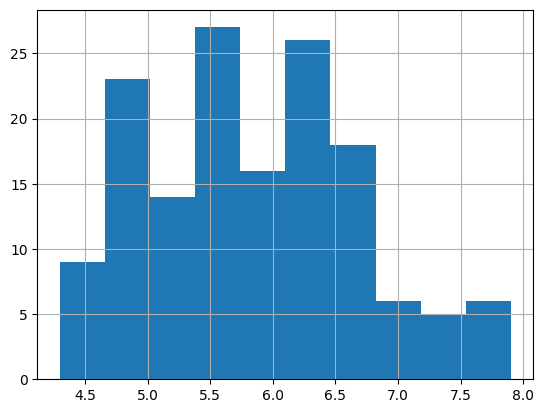

In [20]:
df['SepalLengthCm'].hist()


<Axes: >

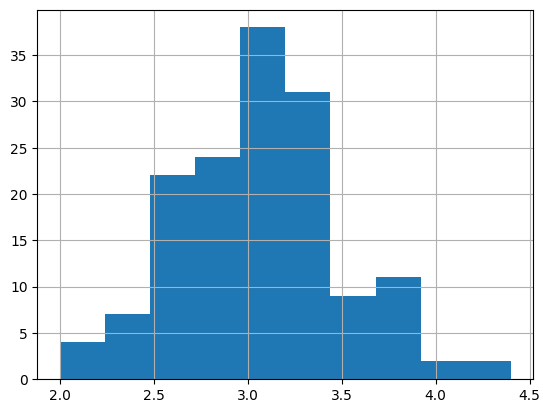

In [21]:
df['SepalWidthCm'].hist()


<Axes: >

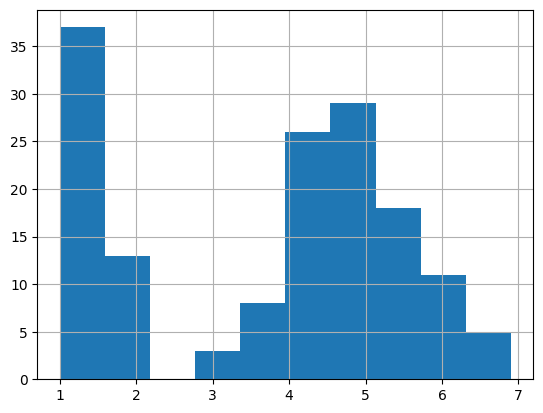

In [22]:
df['PetalLengthCm'].hist()


<Axes: >

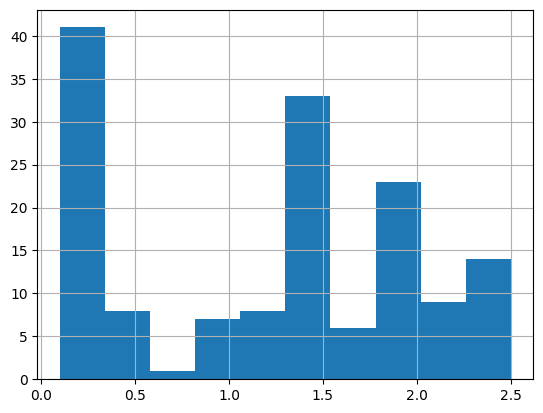

In [23]:
df['PetalWidthCm'].hist()


In [24]:
colors =  ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

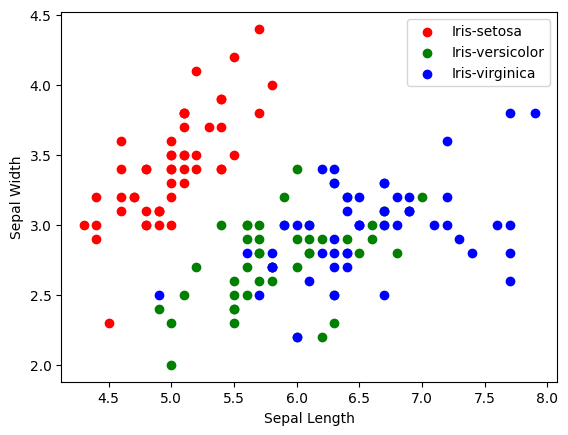

In [28]:
import matplotlib.pyplot as plt # Importing the module

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

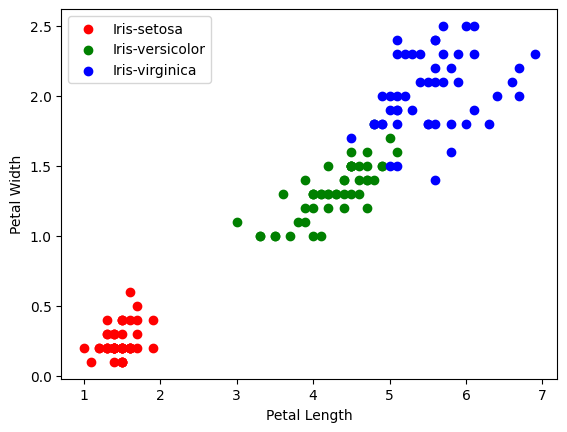

In [30]:
import matplotlib.pyplot as plt # Importing the module

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

**CORRELATION MATRIX**

In [32]:
df.drop('Species', axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

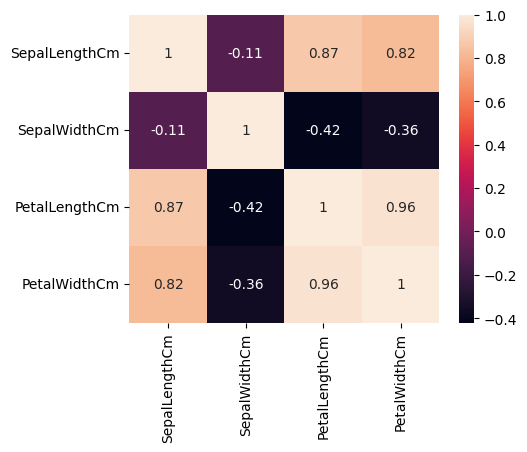

In [35]:
import seaborn as sns

corr = df.drop('Species', axis=1).corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)


**MODEL TRAINING AND TESTING**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop('Species', axis=1)
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accurancy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accurancy:  100.0


In [40]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [41]:
print("Accurancy: ", model.score(x_test, y_test) * 100)

Accurancy:  100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [42]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("KNN Accurancy: ", model.score(x_test, y_test) * 100)

KNN Accurancy:  100.0


In [43]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [44]:
print("Accurancy: ", model.score(x_test, y_test) * 100)

Accurancy:  100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [45]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [46]:
import pickle

In [48]:
filename = 'model.pkl'
try:
    with open(filename, 'rb') as file:
        model = pickle.load(file)
        print("Model loaded successfully.")
except FileNotFoundError:
    print(f"File '{filename}' not found.")
model = pickle.load(open(filename, 'rb'))

Model loaded successfully.


In [49]:
load_model = pickle.load(open(filename, 'rb'))

In [50]:
load_model.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [51]:
import sklearn
print(sklearn.__version__)

1.3.0


In [54]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)